# ML Project
## Predicting players rating

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
df.shape

(183978, 42)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df_n = df.drop(columns=['id', 'player_fifa_api_id', 'player_api_id', 'date'])
df_n.shape

(183978, 38)

In [7]:
df_n.isna().sum()

overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling             836
gk_kicking          

In [8]:
df_n = df_n.dropna(axis=0)
df_n.reset_index(inplace = True)
df_n = df_n.drop(['index'],axis=1)
df_n.isna().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [9]:
df_n.shape

(180354, 38)

In [10]:
df_n

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180349,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
180350,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
180351,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
180352,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [11]:
df.shape[0]-df_n.shape[0]        # number of row we drop  

3624

In [12]:
df_n.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,68.635317,73.479457,55.142071,49.962136,57.263476,62.486726,49.488927,59.265755,53.001408,49.392783,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,7.027950,6.581963,17.247231,19.041760,16.478716,14.172493,18.252319,17.741351,18.245476,17.820262,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


In [13]:
df_n.describe(include='object')

,preferred_foot,attacking_work_rate,defensive_work_rate
count,180354,180354,180354
unique,2,8,18
top,right,medium,medium
freq,136247,125070,130846


In [14]:
obj_col = [i for i in df_n.columns if df_n[i].dtype =='object']
num_col = [i for i in df_n.columns if i not in obj_col]
print(obj_col)
print()
print(num_col)
print()
print('Number of Numerical features : %d'%len(num_col))

['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

['overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']

Number of Numerical features : 35


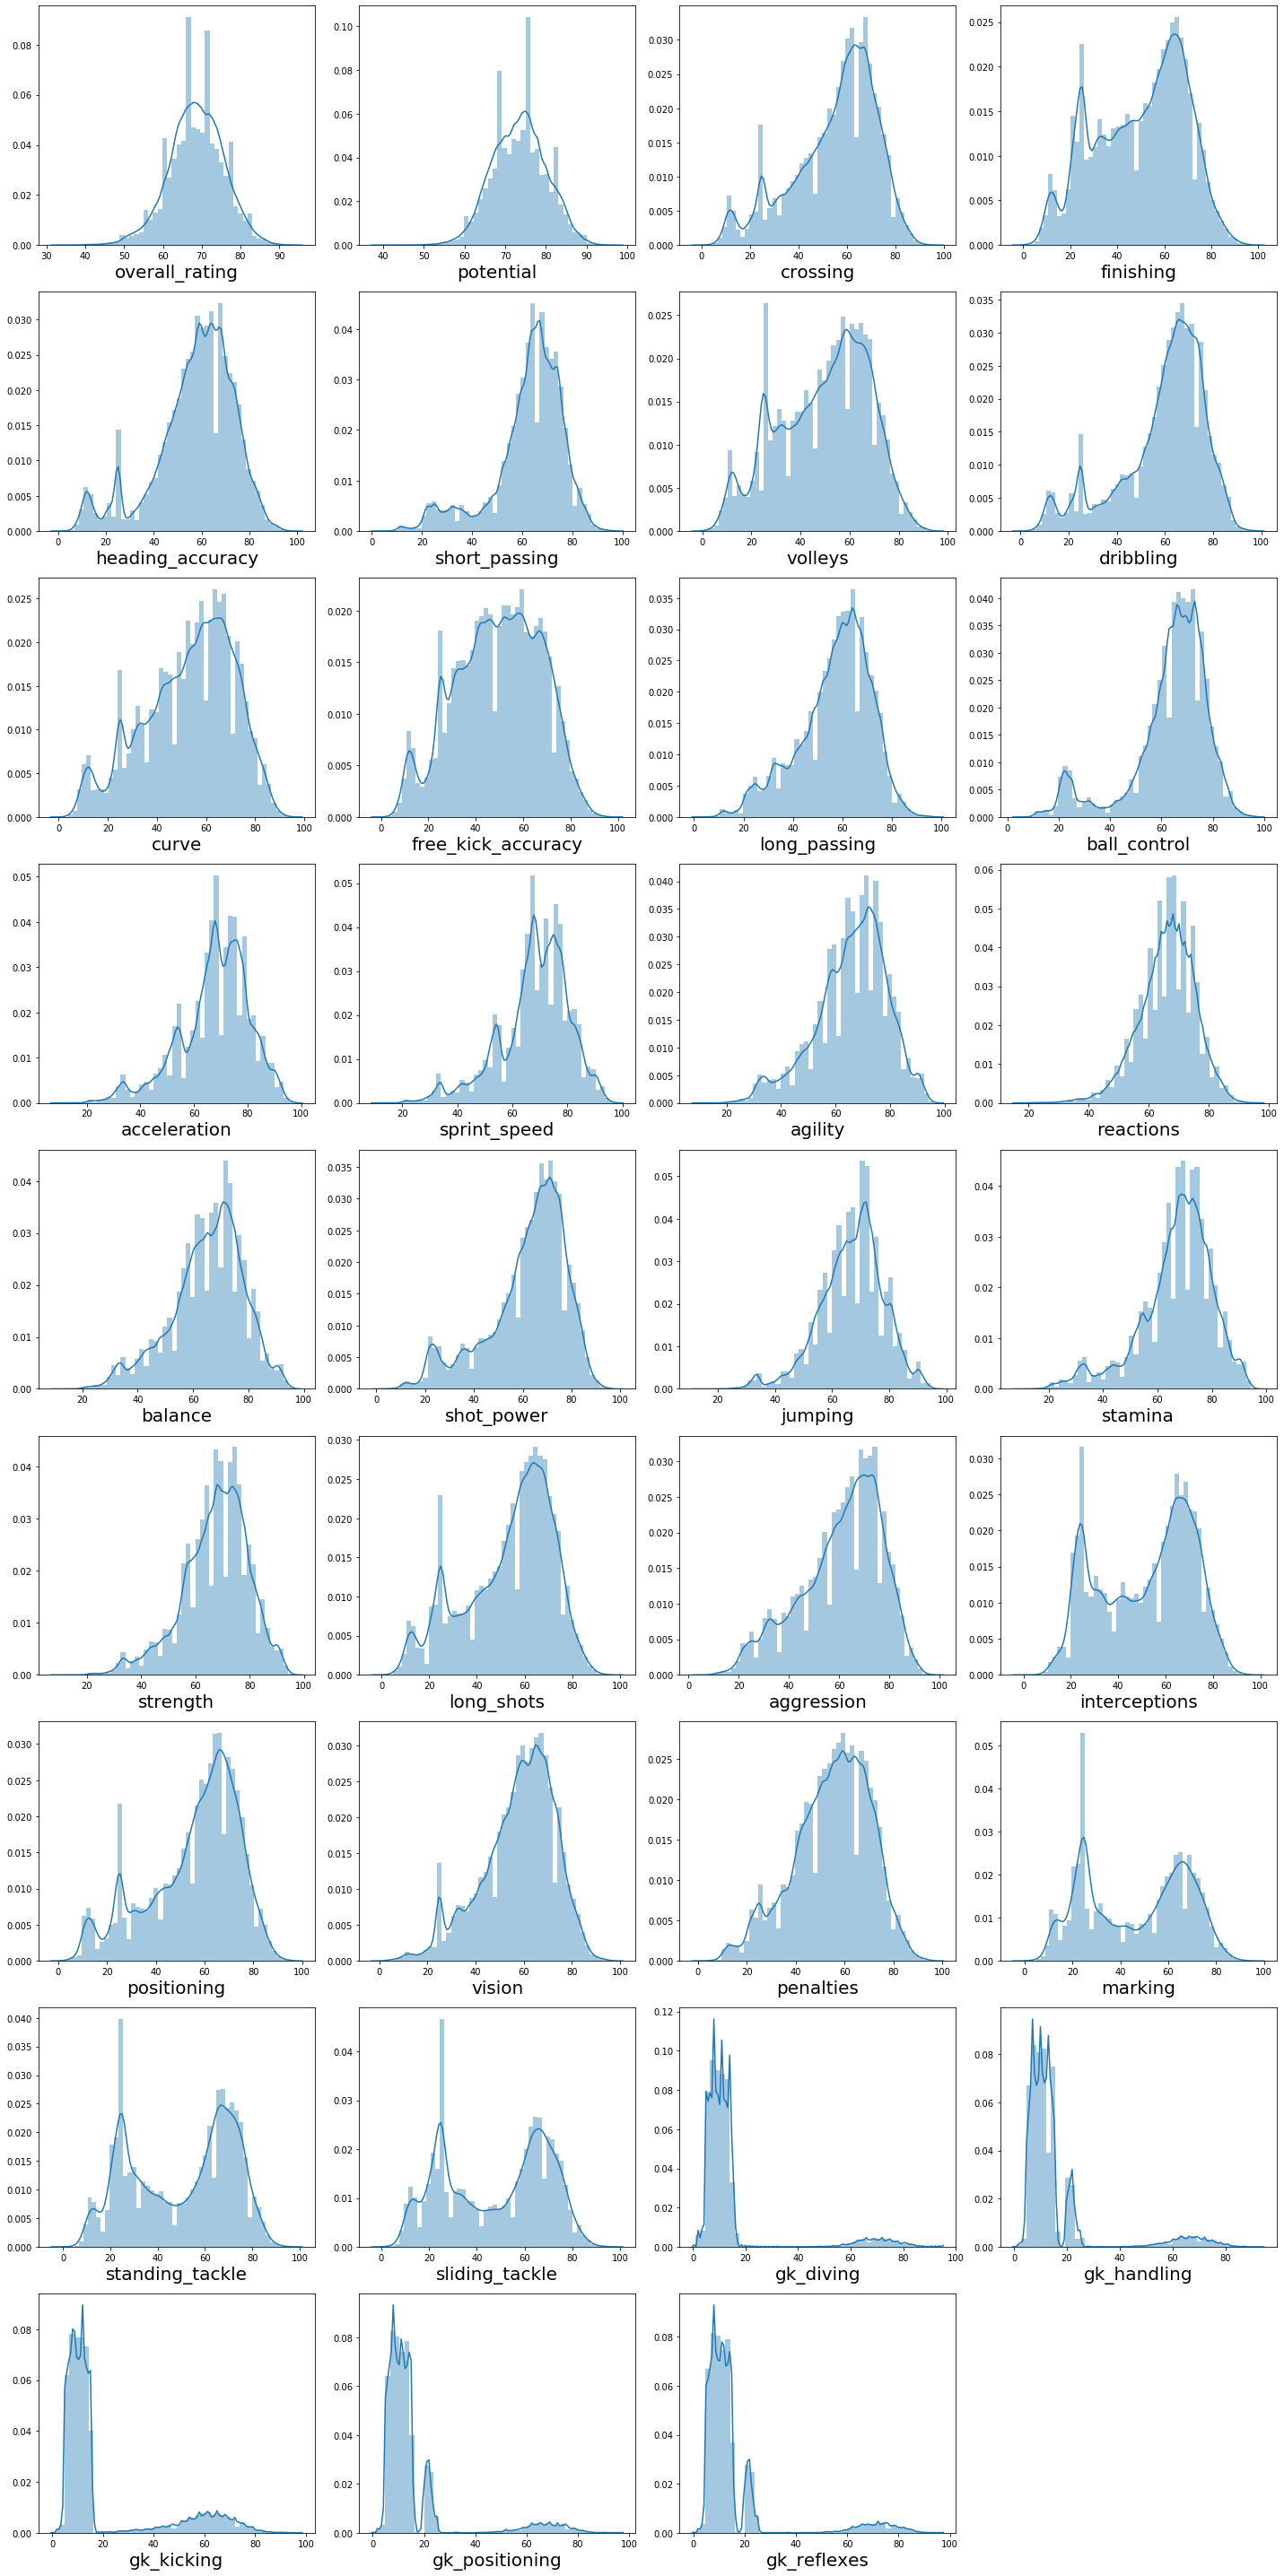

In [15]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in df_n[num_col]:
    if plotnumber<=35 :
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(df_n[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()

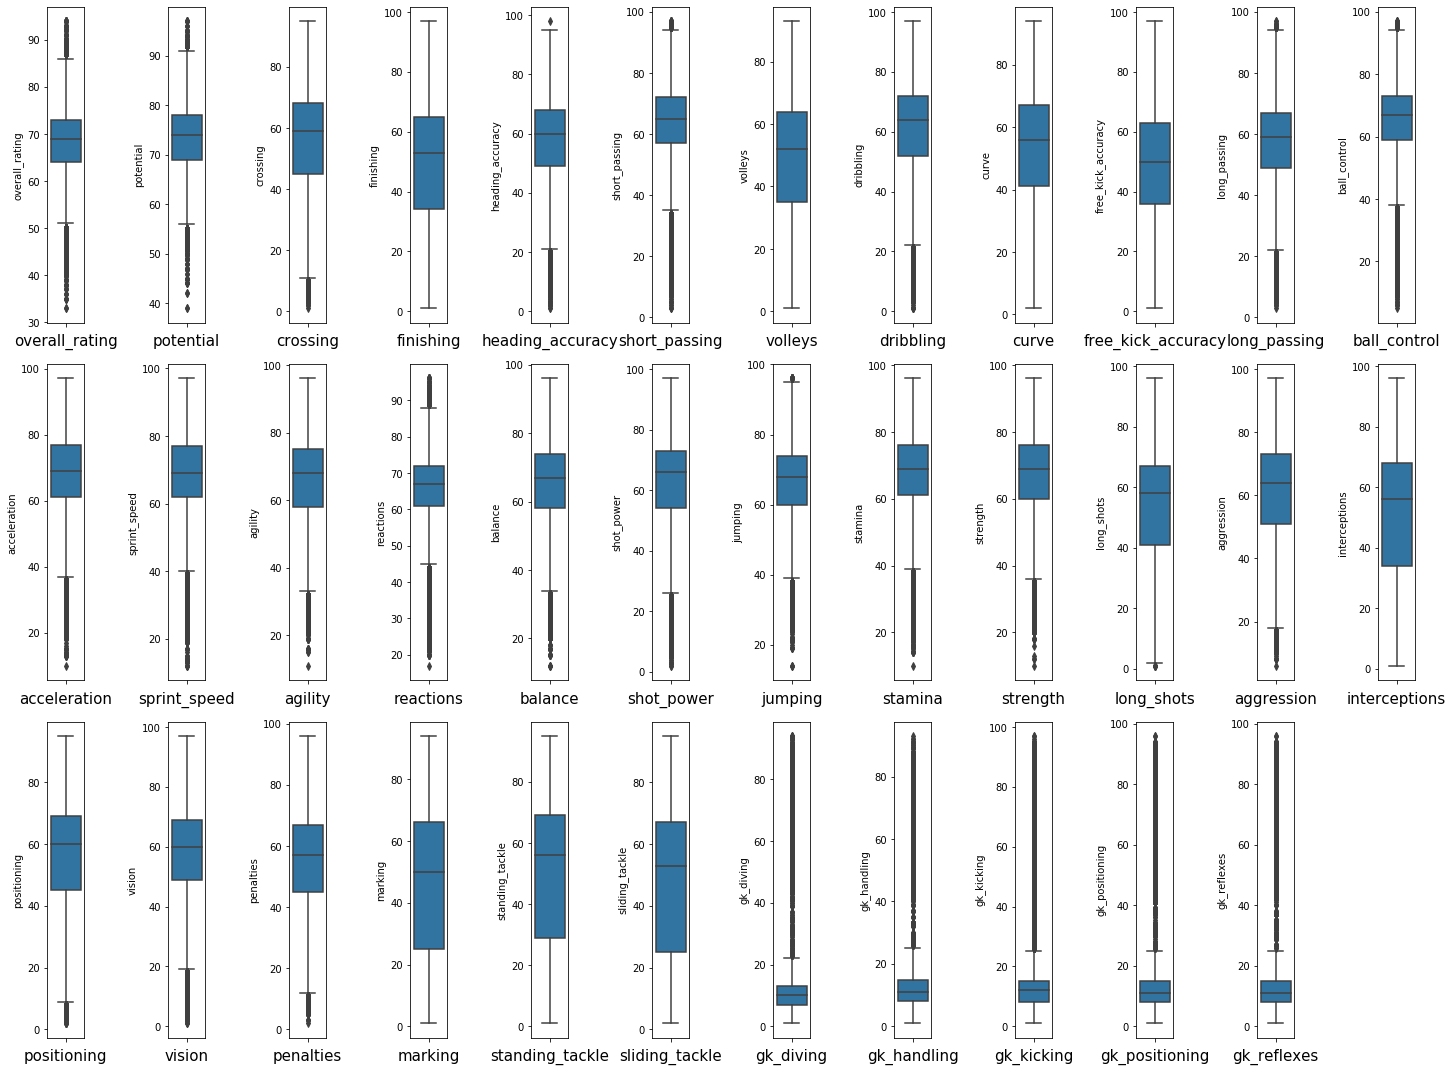

In [16]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df_n[num_col]:
    if plotnumber<=35 :
        ax = plt.subplot(3,12,plotnumber)
        sns.boxplot(y=column, data = df_n)
        plt.xlabel(column,fontsize=15)
        plotnumber+=1
plt.tight_layout()

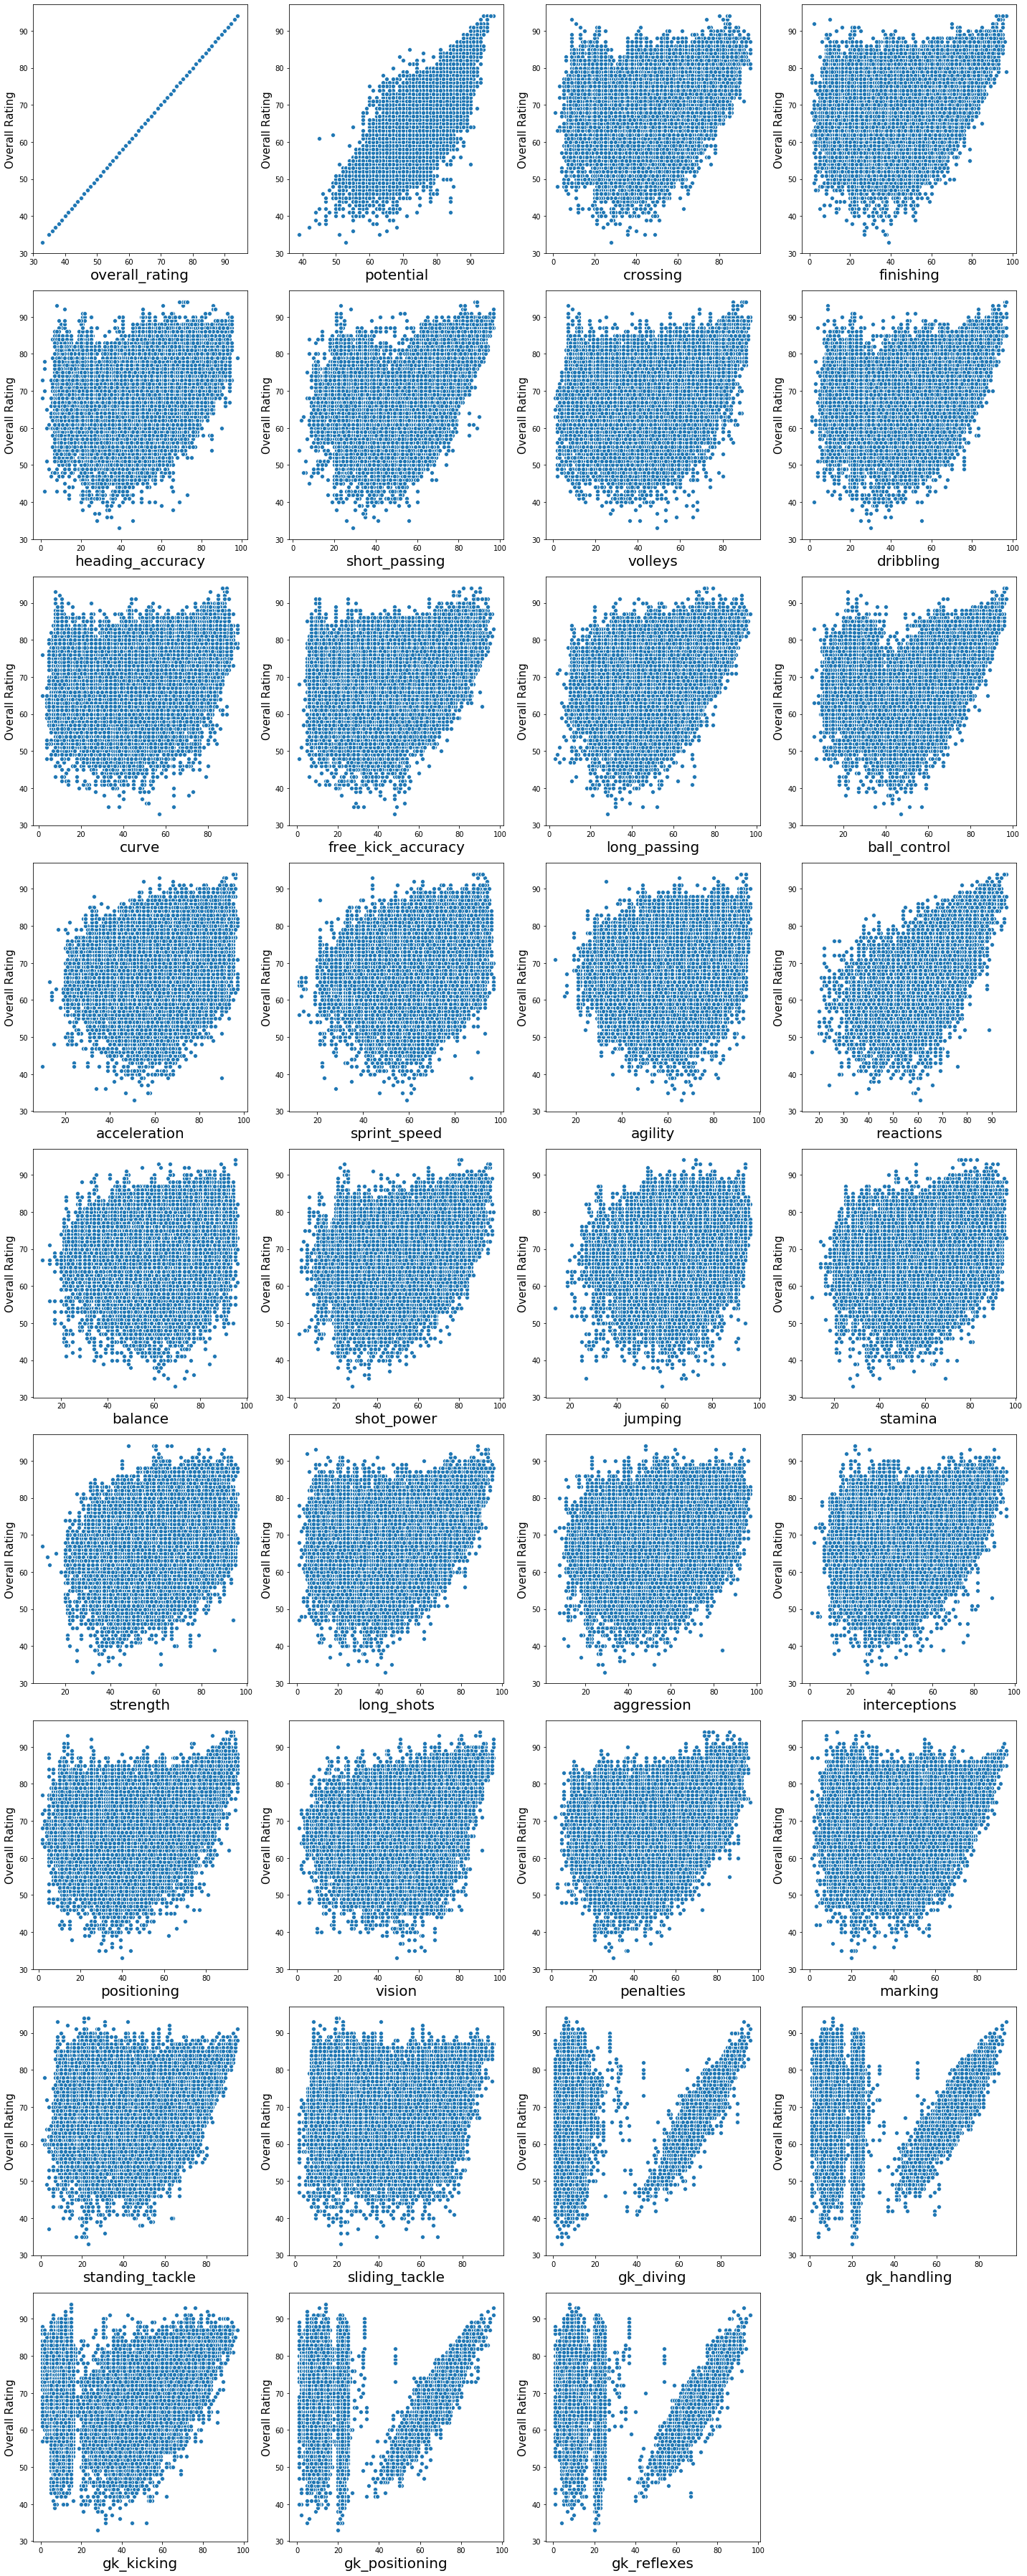

In [54]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1

for column in df_n[num_col]:
    if plotnumber<=35 :
        ax = plt.subplot(9,4,plotnumber)
        sns.scatterplot(x = column , y = 'overall_rating',data = df_n)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Overall Rating',fontsize=15)
        plotnumber+=1
plt.tight_layout()

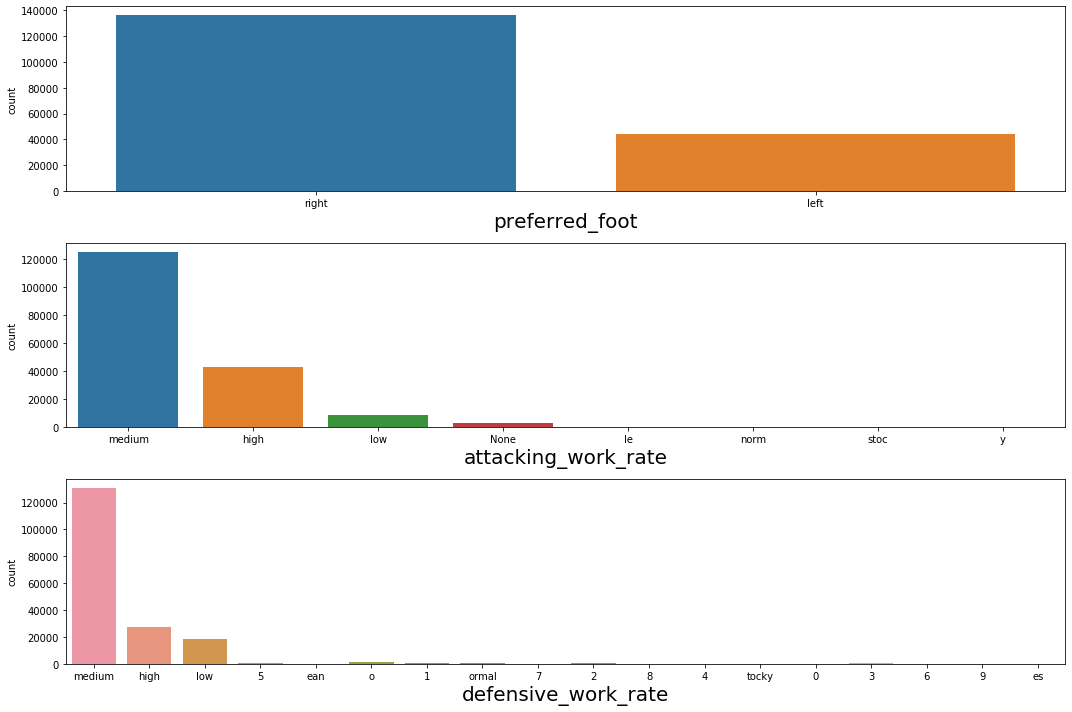

In [18]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in df_n[obj_col]:
    if plotnumber<=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.countplot(df_n[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()

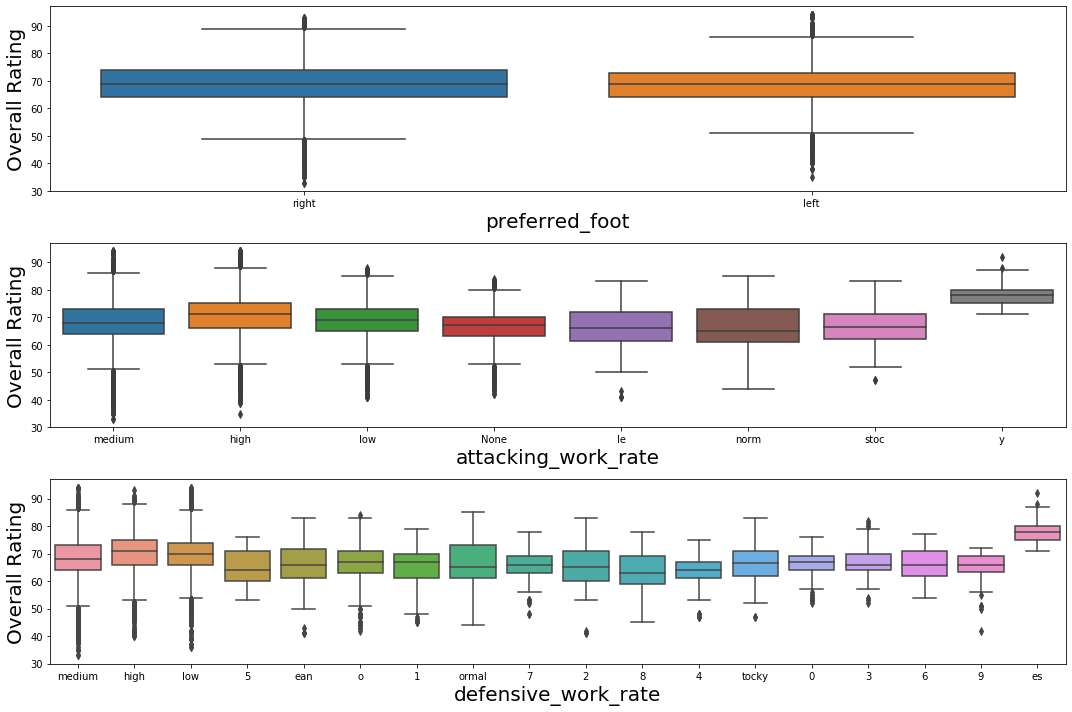

In [19]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in df_n[obj_col]:
    if plotnumber<=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.boxplot(x=column,y='overall_rating' , data = df_n)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Overall Rating',fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [20]:
for col in obj_col:
    print(pd.DataFrame(df[col].value_counts()).T)
    print()

                 right   left
preferred_foot  138409  44733

                     medium   high   low  None  norm    y   le  stoc
attacking_work_rate  125070  42823  8569  3639   348  106  104    89

                     medium   high    low    _0     o    1  ormal    2    3  \
defensive_work_rate  130846  27041  18432  2394  1550  441    348  342  258   

                       5    7    6    0    9    4   es  ean  tocky   8  
defensive_work_rate  234  217  197  197  152  116  106  104     89  78  



In [21]:
for col in obj_col:
    a = pd.DataFrame(df_n[col].value_counts())
    print('For column {} number of uniuqe category are {}'.format(col,a.shape[0]))
    print('The count and percentage of category is : ')
    for i in a.index:
        n = a.loc[i][0]
        p = round(n/df_n.shape[0],6)
        print('The count of {} is {} and percentage is {}'.format(i,n,p))
    print()

For column preferred_foot number of uniuqe category are 2
The count and percentage of category is : 
The count of right is 136247 and percentage is 0.755442
The count of left is 44107 and percentage is 0.244558

For column attacking_work_rate number of uniuqe category are 8
The count and percentage of category is : 
The count of medium is 125070 and percentage is 0.69347
The count of high is 42823 and percentage is 0.237439
The count of low is 8569 and percentage is 0.047512
The count of None is 3317 and percentage is 0.018392
The count of norm is 317 and percentage is 0.001758
The count of y is 94 and percentage is 0.000521
The count of stoc is 86 and percentage is 0.000477
The count of le is 78 and percentage is 0.000432

For column defensive_work_rate number of uniuqe category are 18
The count and percentage of category is : 
The count of medium is 130846 and percentage is 0.725495
The count of high is 27041 and percentage is 0.149933
The count of low is 18432 and percentage is 0.10

In [22]:
df_n['attacking_work_rate'].unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [23]:
a_w_r = df_n['attacking_work_rate'].copy()
for i in range(len(a_w_r)):
    if a_w_r.iloc[i] in ['None', 'le', 'norm', 'stoc', 'y']:
        a_w_r.iloc[i] = 'other'
    else:
        a_w_r.iloc[i] = a_w_r.iloc[i]
a_w_r.value_counts()

medium    125070
high       42823
low         8569
other       3892
Name: attacking_work_rate, dtype: int64

In [24]:
print(df_n.shape[0]) 
print(len(a_w_r))

180354
180354


In [25]:
df_n['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '5', 'ean', 'o', '1', 'ormal', '7', '2',
       '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

In [26]:
list = ['_0', None , '5', 'ean', 'o', '1', 'ormal', '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es', np.nan]
d_w_r = df_n['defensive_work_rate'].copy()
for i in range(len(d_w_r)):
    if d_w_r.iloc[i] in list:
        d_w_r.iloc[i] = 'other'
    else:
        d_w_r.iloc[i] = d_w_r.iloc[i]
d_w_r.value_counts()

medium    130846
high       27041
low        18432
other       4035
Name: defensive_work_rate, dtype: int64

In [27]:
print(df_n.shape[0]) 
print(len(d_w_r))

180354
180354


In [28]:
df_n['defensive_work_rate'] = d_w_r
df_n['attacking_work_rate'] = a_w_r
df_n

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180349,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
180350,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
180351,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
180352,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [29]:
print(df_n['defensive_work_rate'].unique())
print(df_n['attacking_work_rate'].unique())

['medium' 'high' 'low' 'other']
['medium' 'high' 'low' 'other']


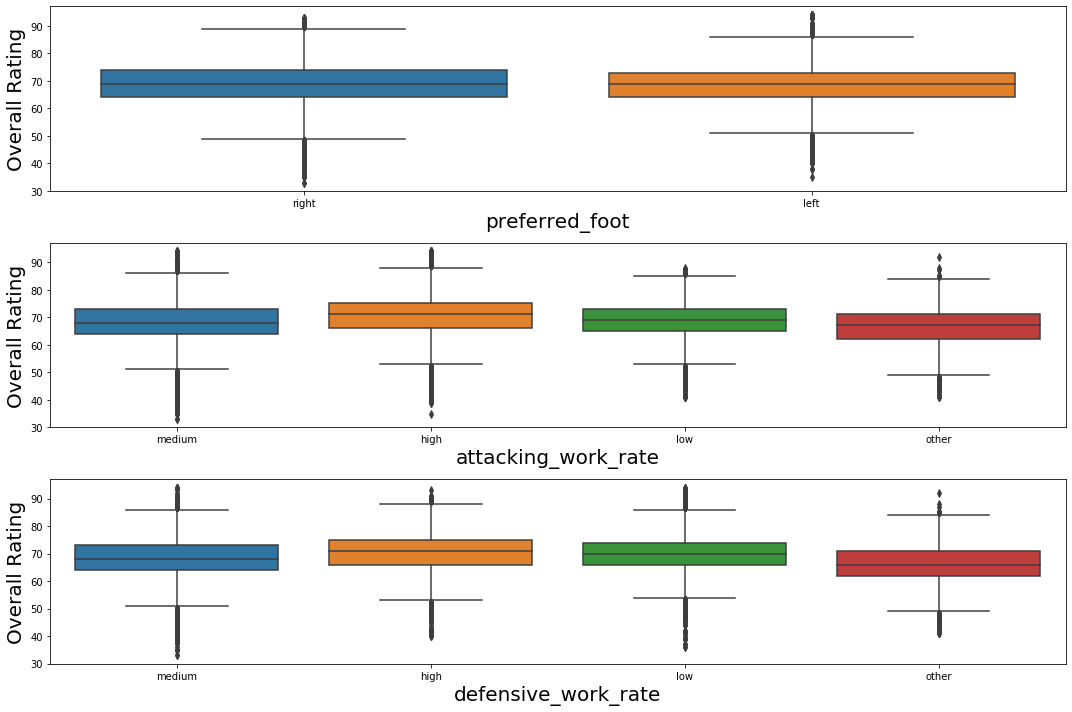

In [30]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for column in df_n[obj_col]:
    if plotnumber<=3 :
        ax = plt.subplot(3,1,plotnumber)
        sns.boxplot(x=column,y='overall_rating' , data = df_n)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Overall Rating',fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [31]:
awr = pd.get_dummies(a_w_r,prefix='attacking_work_rate')
awr.head(5)

,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_other
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [32]:
dwr = pd.get_dummies(d_w_r,prefix='defensive_work_rate')
dwr.head(5)

,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_other
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [33]:
pf = pd.get_dummies(df_n['preferred_foot'],prefix='preferred_foot',drop_first=True)
pf.head(5)

,preferred_foot_right
0,1
1,1
2,1
3,1
4,1


In [34]:
df1 = pd.concat([awr,dwr,pf],axis = 1)
df1

,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_other,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_other,preferred_foot_right
0,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,0,1,0,1
2,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,0,1,0,1
4,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
180349,0,0,1,0,0,1,0,0,1
180350,0,0,1,0,0,1,0,0,1
180351,0,0,1,0,0,1,0,0,1
180352,0,0,1,0,0,1,0,0,1


In [35]:
scaler =StandardScaler()
X = df_n.drop(['overall_rating','preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(180354, 34)

In [36]:
df2 = pd.DataFrame(X_scaled,columns=X.columns)
df2.head(3)

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,-0.376706,-0.35612,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,-0.438543,-0.583202,0.479838,...,-0.255285,-0.445692,0.859417,0.867405,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
1,-0.376706,-0.35612,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,-0.438543,-0.583202,0.479838,...,-0.255285,-0.445692,0.859417,0.867405,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441
2,-1.136360,-0.35612,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,-0.438543,-0.583202,0.479838,...,-0.255285,-0.445692,0.859417,0.727846,0.971189,-0.516387,-0.312336,-0.497843,-0.498736,-0.484441


In [37]:
print(df2.shape)
print(awr.shape)
print(dwr.shape)
print(pf.shape)

(180354, 34)
(180354, 4)
(180354, 4)
(180354, 1)


In [38]:
df_f = pd.concat([df_n.overall_rating,df2,awr,dwr,pf],axis=1,ignore_index=False)
df_f.shape

(180354, 44)

In [39]:
df_f

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,gk_reflexes,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_other,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_other,preferred_foot_right
0,67.0,-0.376706,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,-0.438543,-0.583202,...,-0.484441,0,0,1,0,0,0,1,0,1
1,67.0,-0.376706,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,-0.438543,-0.583202,...,-0.484441,0,0,1,0,0,0,1,0,1
2,62.0,-1.136360,-0.356120,-0.313109,0.833594,-0.104903,-0.300726,-0.465905,-0.438543,-0.583202,...,-0.484441,0,0,1,0,0,0,1,0,1
3,61.0,-1.288291,-0.414101,-0.365626,0.772910,-0.175462,-0.355513,-0.522270,-0.493352,-0.639318,...,-0.542630,0,0,1,0,0,0,1,0,1
4,61.0,-1.288291,-0.414101,-0.365626,0.772910,-0.175462,-0.355513,-0.522270,-0.493352,-0.639318,...,-0.542630,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180349,83.0,1.750325,1.673197,1.419929,0.105380,1.870761,1.507269,1.394162,1.808595,1.605324,...,0.213826,0,0,1,0,0,1,0,0,1
180350,78.0,0.990671,1.093392,1.367412,-0.258727,1.517964,1.507269,1.450527,1.808595,1.380860,...,0.213826,0,0,1,0,0,1,0,0,1
180351,77.0,0.990671,1.093392,1.104831,-0.258727,1.517964,1.507269,1.450527,1.808595,1.380860,...,0.213826,0,0,1,0,0,1,0,0,1
180352,78.0,1.142602,1.093392,0.737217,-0.015989,1.659083,1.507269,1.563259,1.808595,1.324744,...,0.213826,0,0,1,0,0,1,0,0,1


In [40]:
formula = ' '
for a in df_f.columns:
    formula += str(a) + ' + '
formula

' overall_rating + potential + crossing + finishing + heading_accuracy + short_passing + volleys + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + attacking_work_rate_high + attacking_work_rate_low + attacking_work_rate_medium + attacking_work_rate_other + defensive_work_rate_high + defensive_work_rate_low + defensive_work_rate_medium + defensive_work_rate_other + preferred_foot_right + '

In [41]:
formula = '''overall_rating ~ potential + crossing + finishing + heading_accuracy 
+ short_passing + volleys + dribbling + curve + free_kick_accuracy + long_passing 
+ ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power 
+ jumping + stamina + strength + long_shots + aggression + interceptions + positioning 
+ vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling 
+ gk_kicking + gk_positioning + gk_reflexes + attacking_work_rate_high 
+ attacking_work_rate_low + attacking_work_rate_medium + attacking_work_rate_other 
+ defensive_work_rate_high + defensive_work_rate_low + defensive_work_rate_medium 
+ defensive_work_rate_other + preferred_foot_right'''

In [42]:
import statsmodels.formula.api as smf
lm = smf.ols(formula=formula, data=df_f).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 2.384e+04
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:30:37   Log-Likelihood:            -4.3989e+05
No. Observations:              180354   AIC:                         8.799e+05
Df Residuals:                  180312   BIC:                         8.803e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     46.0373      0.013   3613.394      0.000      46.012      46.062
potential                      2.4729      0.010    258.117      0.000       2.454       2.492
crossing                       0.3976      0.015     27.378      0.000       0.369       0.426
finishing                      0.2326      0.018     13.287      0.000       0.198       0.267
heading_accuracy               1.1324      0.013     84.285      0.000       1.106       1.159
short_passing                  0.7258      0.020     37.192      0.000       0.688       0.764
volleys                        0.0567      0.015      3.780      0.000       0.027       0.086
dribbling                     -0.1943      0.021     -9.423      0.000      -0.235      -0.154
curve                          0.2225      0.015     15.251      0.000       0.194       0.251
free_kick_accuracy             0.2266      0.013     17.906      0.000       0.202       0.251
long_passing                   0.1004      0.014      7.403      0.000       0.074       0.127
ball_control                   2.0216      0.024     84.090      0.000       1.974       2.069
acceleration                   0.0797      0.018      4.447      0.000       0.045       0.115
sprint_speed                   0.1335      0.016      8.126      0.000       0.101       0.166
agility                       -0.1118      0.013     -8.519      0.000      -0.137      -0.086
reactions                      1.9042      0.010    192.509      0.000       1.885       1.924
balance                        0.0957      0.010      9.382      0.000       0.076       0.116
shot_power                     0.2690      0.014     19.059      0.000       0.241       0.297
jumping                        0.1713      0.008     21.400      0.000       0.156       0.187
stamina                       -0.0413      0.011     -3.816      0.000      -0.063      -0.020
strength                       0.7162      0.010     70.804      0.000       0.696       0.736
long_shots                    -0.2552      0.017    -15.220      0.000      -0.288      -0.222
aggression                     0.3161      0.011     28.591      0.000       0.294       0.338
interceptions                  0.2377      0.014     16.582      0.000       0.210       0.266
positioning                   -0.1720      0.015    -11.780      0.000      -0.201      -0.143
vision                        -0.0297      0.013     -2.242      0.025      -0.056      -0.004
penalties                      0.2083      0.012     17.917      0.000       0.186       0.231
marking                        0.6744      0.024     28.386      0.000       0.628       0.721
standing_tackle                0.0843      0.028      3.025      0.002       0.030       0.139
sliding_tackle                -0.5827      

In [43]:
lm.rsquared

0.8442671781177569

In [44]:
X = df_f.drop('overall_rating',axis = 1)
y = df_f.overall_rating
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135265, 43)
(45089, 43)
(135265,)
(45089,)


In [45]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
clf.score(x_train,y_train)

0.9994255931074538

In [47]:
clf.score(x_test,y_test)

0.9596793305416716

In [48]:
y_train_pred = clf.predict(x_train)
y_test_pred  = clf.predict(x_test)

In [49]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.028399279720759778
1.985548531402921


In [50]:
from sklearn.ensemble import RandomForestRegressor
rand_clf = RandomForestRegressor(random_state=355)
rand_clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=355, verbose=0, warm_start=False)

In [51]:
print(rand_clf.score(x_train,y_train))
print(rand_clf.score(x_test,y_test))

0.9971289121515622
0.9824328948991956


In [52]:
y_train_pred = rand_clf.predict(x_train)
y_test_pred  = rand_clf.predict(x_test)
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.14194959699948315
0.8650734276610165


In [53]:
sum((y_test_pred-y_test)**2)/len(y_test)

0.8650734276609252